<span style="font-size: 30px;">Assignment 1.</span>

<span style="font-size: 20px;">Q1.0 Dataset Generation<br></span>
<span style="font-size: 20px;">Q1.1 Dataset Analysis<br></span>
<span style="font-size: 20px;">Q1.2 Simple vs Stratified Sampling<br></span>
<span style="font-size: 20px;">Q1.3 Gender-Balanced Cohort<br></span>
<span style="font-size: 20px;">Q1.4 GPA-Uniform Cohort<br></span>
<span style="font-size: 20px;">Q1.5 Program-Major Balanced Cohort<br></span>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots display inside notebook
%matplotlib inline

class StudentDataset:
    # ---------- Q1.0 Dataset Generation ----------
    def __init__(self, num_students: int, seed: int):
        self.num_students = num_students
        self.seed = seed
        np.random.seed(self.seed)

        self.genders = self.generate_gender()
        self.majors = self.generate_major()
        self.programs = self.generate_program(self.majors)
        self.gpas = self.generate_gpa(self.majors)
        self.df = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        return np.random.choice(["Male", "Female", "Other"],
                                size=self.num_students,
                                p=[0.65, 0.33, 0.02]).tolist()

    def generate_major(self) -> list[str]:
        return np.random.choice(["B.Tech", "MS", "PhD"],
                                size=self.num_students,
                                p=[0.70, 0.20, 0.10]).tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        programs = []
        for major in majors:
            if major == "B.Tech":
                p = [0.4, 0.4, 0.1, 0.1]
            elif major == "MS":
                p = [0.3, 0.3, 0.2, 0.2]
            else:
                p = [0.25, 0.25, 0.25, 0.25]
            programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=p))
        return programs

    def generate_gpa(self, majors: list[str]) -> list[float]:
        gpas = []
        for major in majors:
            if major == "B.Tech":
                gpa = np.random.normal(7.0, 1.0)
            elif major == "MS":
                gpa = np.random.normal(8.0, 0.7)
            else:
                gpa = np.random.normal(8.3, 0.5)
            gpas.append(round(np.clip(gpa, 4.0, 10.0), 2))
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        return pd.DataFrame({
            "Gender": self.genders,
            "Major": self.majors,
            "Program": self.programs,
            "GPA": self.gpas
        })

    def get_full_dataframe(self) -> pd.DataFrame:
        return self.df

    # ---------- Q1.1 Dataset Visualizations ----------
    def plot_gender_distribution(self) -> None:
        """Plots the distribution of genders."""
        plt.figure(figsize=(6, 4))
        sns.countplot(x="Gender", data=self.df, palette="pastel")
        plt.title("Gender Distribution")
        plt.xlabel("Gender")
        plt.ylabel("Count")
        plt.show()

    def plot_major_distribution(self) -> None:
        """Plots the distribution of majors."""
        plt.figure(figsize=(6, 4))
        sns.countplot(x="Major", data=self.df, palette="viridis")
        plt.title("Major Distribution")
        plt.xlabel("Major")
        plt.ylabel("Count")
        plt.show()

    def plot_program_distribution(self) -> None:
        """Plots the distribution of programs."""
        plt.figure(figsize=(6, 4))
        sns.countplot(x="Program", data=self.df, palette="magma")
        plt.title("Program Distribution")
        plt.xlabel("Program")
        plt.ylabel("Count")
        plt.show()

    def plot_gpa_distribution(self, bins: int = 20) -> None:
        """Plots histogram of GPA."""
        plt.figure(figsize=(6, 4))
        sns.histplot(self.df["GPA"], bins=bins, kde=True, color="skyblue")
        plt.title("GPA Distribution")
        plt.xlabel("GPA")
        plt.ylabel("Frequency")
        plt.show()

    def plot_program_by_major(self) -> None:
        """Plots program distribution conditioned on major."""
        plt.figure(figsize=(8, 6))
        sns.countplot(x="Major", hue="Program", data=self.df)
        plt.title("Program Distribution by Major")
        plt.xlabel("Major")
        plt.ylabel("Count")
        plt.legend(title="Program")
        plt.show()

    def plot_gpa_by_major(self) -> None:
        """Plots GPA distribution per major."""
        plt.figure(figsize=(8, 5))
        sns.boxplot(x="Major", y="GPA", data=self.df, palette="coolwarm")
        plt.title("GPA by Major")
        plt.show()

    def plot_gpa_by_program(self) -> None:
        """Plots GPA distribution per program."""
        plt.figure(figsize=(8, 5))
        sns.boxplot(x="Program", y="GPA", data=self.df, palette="cubehelix")
        plt.title("GPA by Program")
        plt.show()

    def plot_gpa_by_program_and_major(self) -> None:
        """Plots GPA by both program and major."""
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="Program", y="GPA", hue="Major", data=self.df)
        plt.title("GPA by Program and Major")
        plt.show()

    def plot_sampled_dataset(self) -> None:
        """Visualizes gender, major, program, and GPA for 100 random students."""
        sample = self.df.sample(100, random_state=self.seed)
        sns.pairplot(sample, hue="Gender", palette="husl")
        plt.suptitle("Sampled 100 Students - Pairwise Plot", y=1.02)
        plt.show()

    def plot_entire_dataset_summary(self) -> None:
        """Displays overall dataset summary via pairplot."""
        sns.pairplot(self.df.sample(500, random_state=self.seed), hue="Major")
        plt.suptitle("Dataset Summary (Sample of 500)", y=1.02)
        plt.show()
    # ---------- Q1.1 (b) GPA Summary Statistics ----------

    def gpa_mean_std(self) -> tuple[float, float]:
        """Returns mean and std deviation of GPA."""
        mean_gpa = round(self.df["GPA"].mean(), 3)
        std_gpa = round(self.df["GPA"].std(), 3)
        print(f"GPA Mean: {mean_gpa}, GPA Std Dev: {std_gpa}")
        return mean_gpa, std_gpa

    # ---------- Q1.1 (c) Program-Major Heatmap ----------

    def count_students_per_program_major_pair(self) -> pd.DataFrame:
        """Counts students per (program, major) pair."""
        count_df = self.df.groupby(["Program", "Major"]).size().unstack(fill_value=0)
        return count_df

    def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
        """Displays heatmap for (program, major) pairs."""
        plt.figure(figsize=(8, 5))
        sns.heatmap(counts_df, annot=True, fmt="d", cmap="YlGnBu")
        plt.title("Number of Students per (Program, Major) Pair")
        plt.xlabel("Major")
        plt.ylabel("Program")
        plt.show()

    # ---------- Q1.2 Random vs Stratified Sampling ----------
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50):
        mean_gpas = [self.df.sample(n, random_state=self.seed + i)["GPA"].mean()
                     for i in range(repeats)]
        print(f"[Random] Mean={np.mean(mean_gpas):.3f}, Std={np.std(mean_gpas):.3f}")
        return np.mean(mean_gpas), np.std(mean_gpas)

    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50):
        majors = self.df["Major"].unique()
        props = self.df["Major"].value_counts(normalize=True)
        mean_gpas = []
        for i in range(repeats):
            samples = []
            for m in majors:
                sub = self.df[self.df["Major"] == m]
                n_m = int(round(n * props[m]))
                samples.append(sub.sample(n_m, random_state=self.seed + i))
            combined = pd.concat(samples)
            mean_gpas.append(combined["GPA"].mean())
        print(f"[Stratified] Mean={np.mean(mean_gpas):.3f}, Std={np.std(mean_gpas):.3f}")
        return np.mean(mean_gpas), np.std(mean_gpas)

    # ---------- Q1.3 Gender-Balanced Cohort Sampling ----------
    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5):
        results = []
        genders = self.df["Gender"].unique()
        n_per_gender = n // len(genders)
        for i in range(repeats):
            samples = [self.df[self.df["Gender"] == g].sample(n_per_gender,
                      random_state=self.seed + i) for g in genders]
            combined = pd.concat(samples)
            counts = combined["Gender"].value_counts().to_dict()
            results.append(counts)
            print(f"Repeat {i+1}: {counts}")
        return results

    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5):
        results = []
        genders = self.df["Gender"].unique()
        for i in range(repeats):
            samples = []
            for j in range(n):
                g = np.random.choice(genders)
                sub = self.df[self.df["Gender"] == g]
                samples.append(sub.sample(1, random_state=self.seed + i + j))
            combined = pd.concat(samples)
            counts = combined["Gender"].value_counts().to_dict()
            results.append(counts)
            print(f"Repeat {i+1}: {counts}")
        return results

    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10):
        avg_diffs = []
        genders = self.df["Gender"].unique()
        for n in sample_sizes:
            diffs = []
            for r in range(repeats):
                samples = []
                for i in range(n):
                    g = np.random.choice(genders)
                    sub = self.df[self.df["Gender"] == g]
                    samples.append(sub.sample(1, random_state=self.seed + r + i))
                combined = pd.concat(samples)
                counts = combined["Gender"].value_counts()
                diffs.append((counts.max() - counts.min()) / n)
            avg_diffs.append(np.mean(diffs))
        sns.barplot(x=sample_sizes, y=avg_diffs, palette="coolwarm")
        plt.title("Average Max Relative Gender Difference vs Sample Size")
        plt.xlabel("Sample Size")
        plt.ylabel("Avg Max Relative Difference")
        plt.show()

    # ---------- Q1.4 GPA-Uniform Cohort Sampling ----------
    def sample_gpa_uniform_random(self, bins: int = 5, n: int = 300):
        self.df["GPA_bin"] = pd.cut(self.df["GPA"], bins=bins)
        samples = self.df.groupby("GPA_bin").apply(lambda x: x.sample(n // bins, random_state=self.seed))
        print(samples["GPA"].describe())
        return samples

    def plot_gpa_vs_sample_size(self):
        sns.histplot(self.df["GPA"], bins=20, kde=True, color="skyblue")
        plt.title("GPA Distribution (Uniform Sampling Reference)")
        plt.show()

    # ---------- Q1.5 Combined Summary ----------
    def dataset_summary(self):
        print(self.df.describe(include="all"))

        # ---------- Q1.5 Program–Major Balanced Cohort Sampling ----------
    def sample_program_major_balanced(self, n: int = 60) -> pd.DataFrame:
        """
        Using Sampling Strategy A: Select n students so that all valid (Program, Major)
        combinations are represented approximately equally.
        """
        groups = self.df.groupby(["Program", "Major"])
        group_count = len(groups)
        n_per_group = max(1, n // group_count)  # ensure at least 1 per group

        samples = []
        too_small_groups = []

        for (prog, major), group in groups:
            if len(group) < n_per_group:
                too_small_groups.append((prog, major, len(group)))
                sample = group.sample(len(group), random_state=self.seed)
            else:
                sample = group.sample(n_per_group, random_state=self.seed)
            samples.append(sample)

        sampled_df = pd.concat(samples)
        print(f"Total sampled: {len(sampled_df)} (target={n})")

        # Report small groups if any
        if too_small_groups:
            print("\n⚠️ Some groups were too small to fill quota:")
            for prog, major, size in too_small_groups:
                print(f"  ({prog}, {major}) had only {size} students → took all.")

        return sampled_df


    def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
        """Displays counts and heatmap for sampled Program–Major pairs."""
        counts = sampled_df.groupby(["Program", "Major"]).size().unstack(fill_value=0)
        print("\nProgram–Major Counts:")
        print(counts)

        plt.figure(figsize=(8, 5))
        sns.heatmap(counts, annot=True, fmt="d", cmap="YlGnBu")
        plt.title("Sampled Students per (Program, Major) Pair")
        plt.xlabel("Major")
        plt.ylabel("Program")
        plt.show()



In [13]:
# Implementation / Function Calls

import hashlib

username = "diptesh"  # your IIITH username
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)

# Create dataset object
dataset = StudentDataset(num_students=10000, seed=seed)

In [3]:
# View first few rows
print(dataset.get_full_dataframe().head())

  Gender   Major Program   GPA
0   Male     PhD     ECE  9.04
1   Male  B.Tech     ECE  6.24
2   Male     PhD     CND  7.60
3   Male  B.Tech     ECE  7.53
4   Male  B.Tech     ECE  6.01


C:\Users\Admin\AppData\Local\Temp\ipykernel_12772\540244252.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=self.df, palette="pastel")


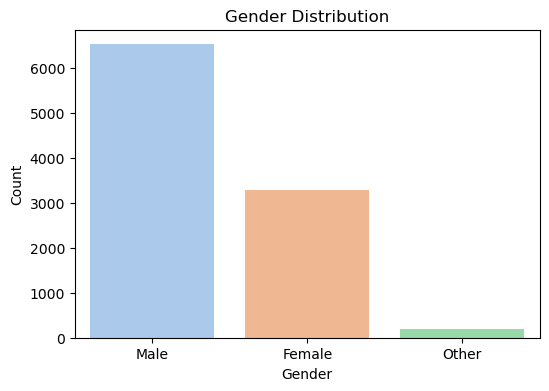

C:\Users\Admin\AppData\Local\Temp\ipykernel_12772\540244252.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Major", data=self.df, palette="viridis")


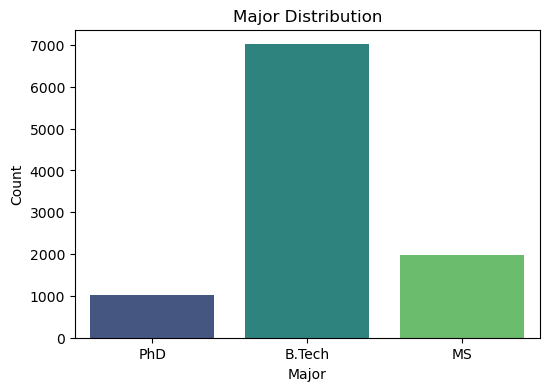

C:\Users\Admin\AppData\Local\Temp\ipykernel_12772\540244252.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Program", data=self.df, palette="magma")


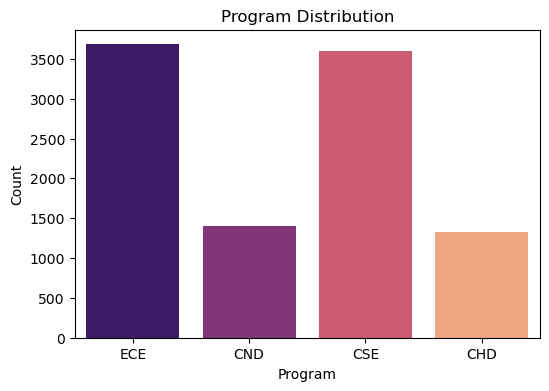

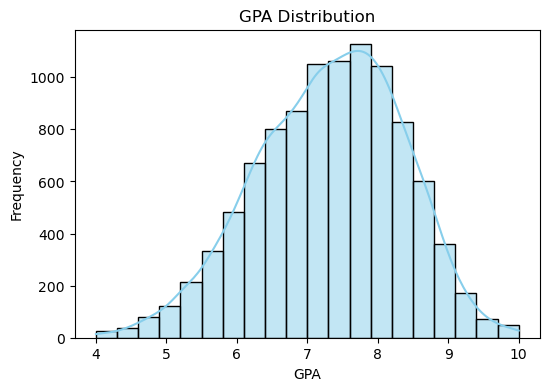

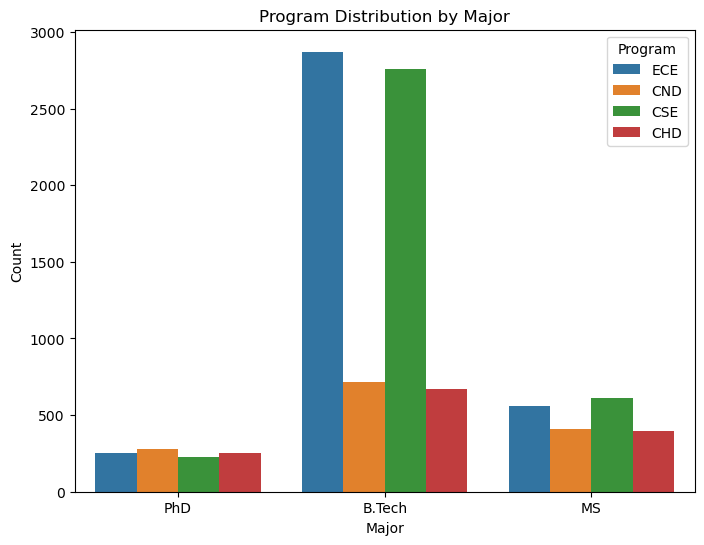

C:\Users\Admin\AppData\Local\Temp\ipykernel_12772\540244252.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Major", y="GPA", data=self.df, palette="coolwarm")


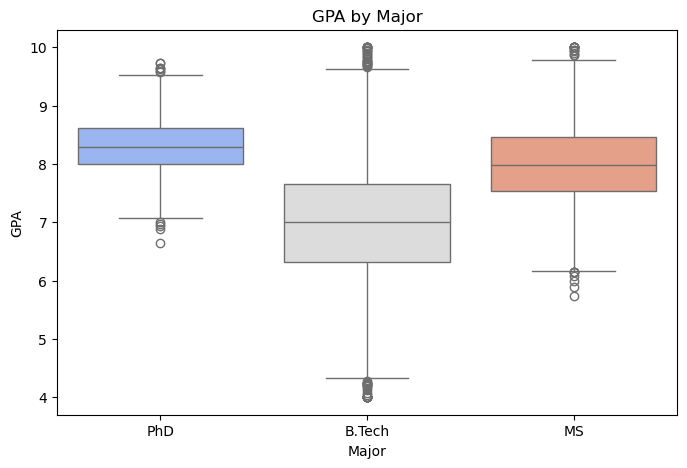

C:\Users\Admin\AppData\Local\Temp\ipykernel_12772\540244252.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Program", y="GPA", data=self.df, palette="cubehelix")


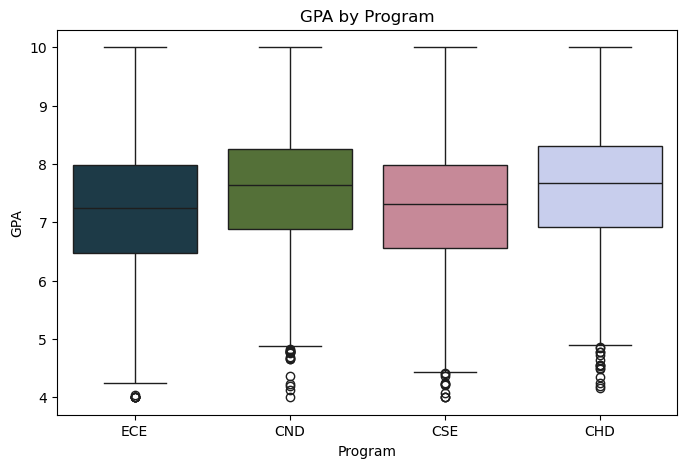

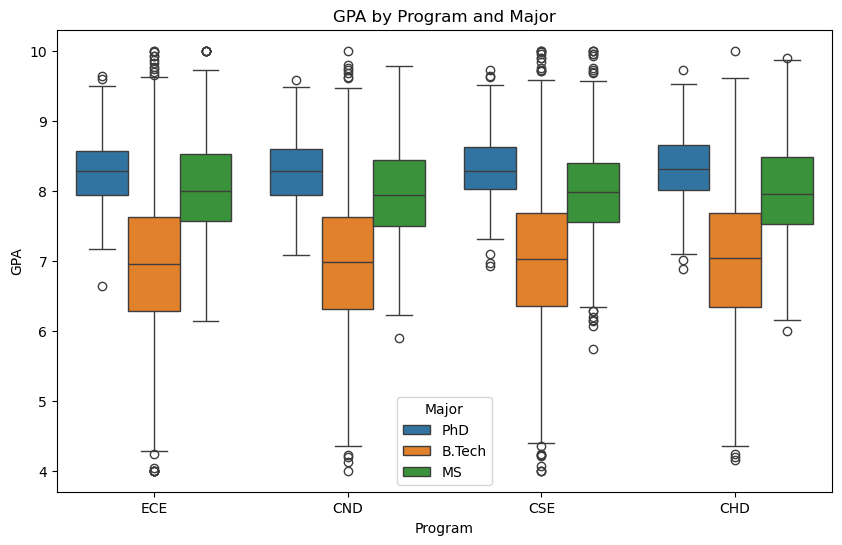

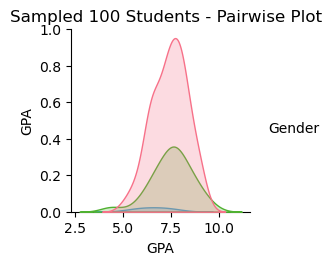

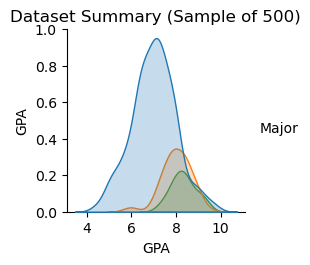

In [4]:
# ---------- Q1.1 ----------
# Q1.1 (a) Visualizations
dataset.plot_gender_distribution()
dataset.plot_major_distribution()
dataset.plot_program_distribution()
dataset.plot_gpa_distribution()
dataset.plot_program_by_major()
dataset.plot_gpa_by_major()
dataset.plot_gpa_by_program()
dataset.plot_gpa_by_program_and_major()
dataset.plot_sampled_dataset()
dataset.plot_entire_dataset_summary()



In [5]:
# Q1.1 (b) GPA stats
dataset.gpa_mean_std()



GPA Mean: 7.317, GPA Std Dev: 1.039


(np.float64(7.317), 1.039)

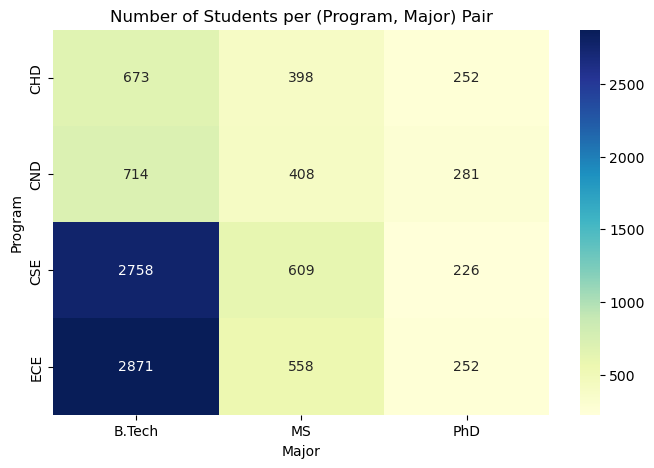

In [6]:
# Q1.1 (c) Program-Major pair heatmap
counts = dataset.count_students_per_program_major_pair()
dataset.visualize_students_per_program_major_pair(counts)

In [7]:
# ---------- Q1.2 ----------
random_mean, random_std = dataset.get_gpa_mean_std_random()
strat_mean, strat_std = dataset.get_gpa_mean_std_stratified()


[Random] Mean=7.320, Std=0.041
[Stratified] Mean=7.321, Std=0.043


In [8]:
# ---------- Q1.3 ----------
dataset.get_gender_balanced_counts()


Repeat 1: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 2: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 3: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 4: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 5: {'Male': 100, 'Female': 100, 'Other': 100}


[{'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100}]

In [9]:
dataset.sample_gender_uniform_random()


Repeat 1: {'Male': 110, 'Other': 98, 'Female': 92}
Repeat 2: {'Female': 103, 'Male': 100, 'Other': 97}
Repeat 3: {'Other': 108, 'Male': 106, 'Female': 86}
Repeat 4: {'Female': 105, 'Other': 102, 'Male': 93}
Repeat 5: {'Male': 101, 'Other': 101, 'Female': 98}


[{'Male': 110, 'Other': 98, 'Female': 92},
 {'Female': 103, 'Male': 100, 'Other': 97},
 {'Other': 108, 'Male': 106, 'Female': 86},
 {'Female': 105, 'Other': 102, 'Male': 93},
 {'Male': 101, 'Other': 101, 'Female': 98}]

C:\Users\Admin\AppData\Local\Temp\ipykernel_12772\540244252.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sample_sizes, y=avg_diffs, palette="coolwarm")


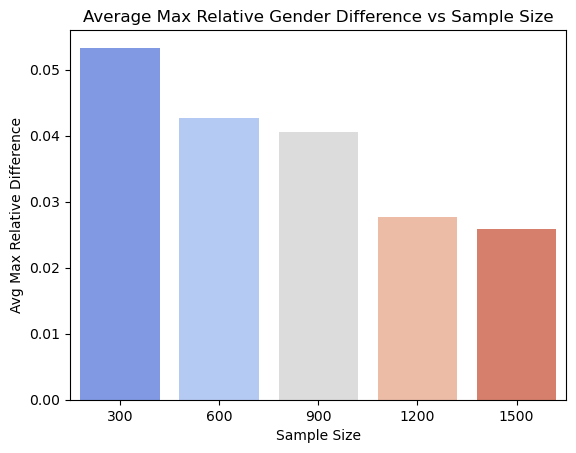

In [10]:
dataset.plot_avg_max_gender_diff_vs_sample_size([300, 600, 900, 1200, 1500])


In [17]:
# ---------- Q1.4 ----------
dataset.sample_gpa_uniform_random()


count    300.000000
mean       7.007900
std        1.578283
min        4.000000
25%        5.687500
50%        7.045000
75%        8.372500
max       10.000000
Name: GPA, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_12772\3151970481.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  samples = self.df.groupby("GPA_bin").apply(lambda x: x.sample(n // bins, random_state=self.seed))
C:\Users\Admin\AppData\Local\Temp\ipykernel_12772\3151970481.py:247: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = self.df.groupby("GPA_bin").apply(lambda x: x.sample(n // bins, random_state=self.seed))


Gender   Major Program   GPA       GPA_bin
GPA_bin                                                      
(3.994, 5.2] 9478   Other  B.Tech     CND  4.95  (3.994, 5.2]
             2272    Male  B.Tech     ECE  4.88  (3.994, 5.2]
             6303  Female  B.Tech     CSE  4.89  (3.994, 5.2]
             1236    Male  B.Tech     CSE  4.75  (3.994, 5.2]
             5459    Male  B.Tech     CHD  4.97  (3.994, 5.2]
...                   ...     ...     ...   ...           ...
(8.8, 10.0]  4044  Female     PhD     ECE  8.97   (8.8, 10.0]
             9064    Male      MS     ECE  9.31   (8.8, 10.0]
             6968    Male     PhD     CND  9.09   (8.8, 10.0]
             4470  Female      MS     ECE  9.05   (8.8, 10.0]
             9514  Female      MS     ECE  8.88   (8.8, 10.0]

[300 rows x 5 columns]

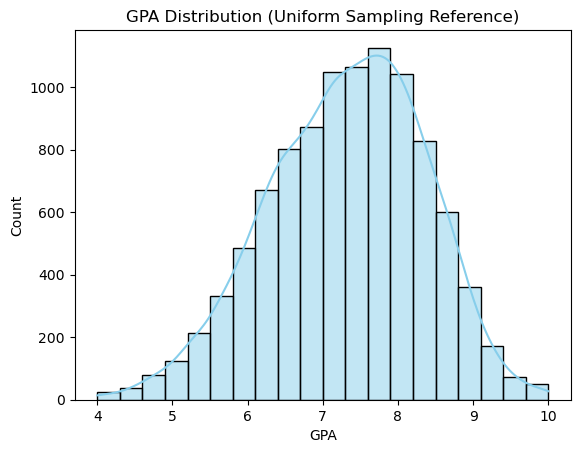

In [18]:
dataset.plot_gpa_vs_sample_size()


In [12]:
dataset.dataset_summary()

       Gender   Major Program           GPA     GPA_bin
count   10000   10000   10000  10000.000000       10000
unique      3       3       4           NaN           5
top      Male  B.Tech     ECE           NaN  (6.4, 7.6]
freq     6525    7016    3681           NaN        3802
mean      NaN     NaN     NaN      7.317143         NaN
std       NaN     NaN     NaN      1.039043         NaN
min       NaN     NaN     NaN      4.000000         NaN
25%       NaN     NaN     NaN      6.590000         NaN
50%       NaN     NaN     NaN      7.380000         NaN
75%       NaN     NaN     NaN      8.070000         NaN
max       NaN     NaN     NaN     10.000000         NaN


In [15]:
# ---------- Q1.5 ----------
sampled_df = dataset.sample_program_major_balanced(n=60)


Total sampled: 60 (target=60)



Program–Major Counts:
Major    B.Tech  MS  PhD
Program                 
CHD           5   5    5
CND           5   5    5
CSE           5   5    5
ECE           5   5    5


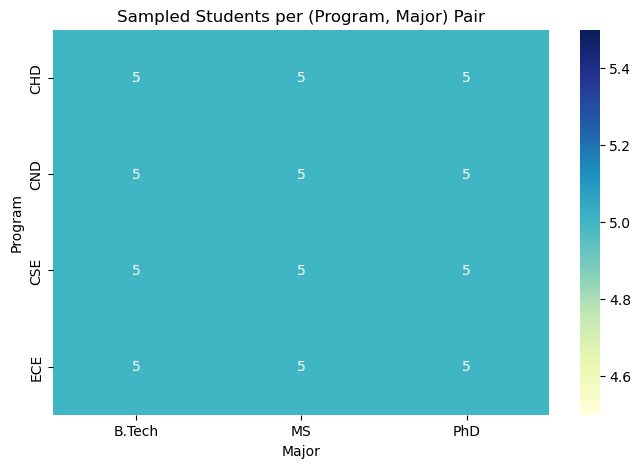

In [16]:
dataset.show_program_major_counts_and_heatmap(sampled_df)


<span style="font-size: 40px;">Q2.0 k-Nearest Neighbors  </span>

In [23]:
# Q2.0: k-NN gender prediction utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Dict, List, Tuple

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ----------------------------
# PerFeatureTransformer
# ----------------------------
class PerFeatureTransformer:
    """
    Fit per-feature transformers and transform DataFrames into numpy arrays.
    Supported transformation types:
      - 'standard' : numeric -> StandardScaler
      - 'onehot'   : categorical -> OneHotEncoder(handle_unknown='ignore')
      - 'ordinal'  : categorical -> OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    """
    def __init__(self):
        self.params = {}
        self.feature_order: List[str] = []
        self.transformers: Dict[str, object] = {}
        self.feature_output_slices: List[Tuple[str, int]] = []  # (feature, num_cols)
        self.fitted = False

    def fit(self, df: pd.DataFrame, params: Dict[str, str]) -> None:
        """
        Fit transformers for each feature according to params.
        params: {feature_name: 'standard'|'onehot'|'ordinal'}
        """
        self.params = params.copy()
        self.feature_order = list(params.keys())
        self.transformers = {}
        self.feature_output_slices = []

        for feat in self.feature_order:
            typ = params[feat]
            col_data = df[[feat]]

            if typ == "standard":
                scaler = StandardScaler()
                scaler.fit(col_data.values.astype(float))
                self.transformers[feat] = scaler
                self.feature_output_slices.append((feat, 1))

            elif typ == "onehot":
                enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
                enc.fit(col_data.astype(str))
                ncols = enc.transform(col_data.astype(str)).shape[1]
                self.transformers[feat] = enc
                self.feature_output_slices.append((feat, ncols))

            elif typ == "ordinal":
                # use unknown_value to avoid errors for unseen categories
                enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
                enc.fit(col_data.astype(str))
                self.transformers[feat] = enc
                self.feature_output_slices.append((feat, 1))

            else:
                raise ValueError(f"Unknown transform type '{typ}' for feature '{feat}'")

        self.fitted = True

    def transform(self, df: pd.DataFrame) -> np.ndarray:
        """
        Apply fitted transformers to df and return a single 2D numpy array.
        """
        if not self.fitted:
            raise RuntimeError("PerFeatureTransformer must be fitted before calling transform()")

        out_cols = []
        for feat in self.feature_order:
            typ = self.params[feat]
            col_data = df[[feat]]

            if typ == "standard":
                scaler = self.transformers[feat]
                arr = scaler.transform(col_data.values.astype(float))
                out_cols.append(arr)

            elif typ == "onehot":
                enc = self.transformers[feat]
                arr = enc.transform(col_data.astype(str))
                out_cols.append(arr)

            elif typ == "ordinal":
                enc = self.transformers[feat]
                arr = enc.transform(col_data.astype(str))
                out_cols.append(arr)

            else:
                raise ValueError(f"Unknown transform type '{typ}' for feature '{feat}'")

        # concatenate horizontally
        X = np.hstack(out_cols) if len(out_cols) > 0 else np.empty((len(df), 0))
        return X

    def fit_transform(self, df: pd.DataFrame, params: Dict[str, str]) -> np.ndarray:
        self.fit(df, params)
        return self.transform(df)


# ----------------------------
# KNNGenderPredictor
# ----------------------------
class KNNGenderPredictor:
    """
    Wrapper to run k-NN experiments predicting Gender.
    Usage:
      predictor = KNNGenderPredictor(student_df, username)
      train_df, val_df, test_df = predictor.train_val_test_split(...)
      predictor.fit_transformers_and_prepare(train_df, features, params)  # internal helper used below
      predictor.get_knn_accuracy_vs_k([...])
      predictor.get_knn_f1_heatmap(k_values, ['euclidean','manhattan','cosine'])
      predictor.get_knn_f1_single_feature_table(...)
    """

    def __init__(self, student_df: pd.DataFrame, username: str):
        self.df = student_df.copy().reset_index(drop=True)
        self.username = username
        self.label_map = {"Male": 0, "Female": 1, "Other": 2}
        self.inv_label_map = {v: k for k, v in self.label_map.items()}
        self.transformer = PerFeatureTransformer()
        self.fitted = False
        # storage for split
        self.train_df = None
        self.val_df = None
        self.test_df = None
        # storage for transformed arrays
        self.X_train = None
        self.X_val = None
        self.X_test = None
        self.y_train = None
        self.y_val = None
        self.y_test = None

    def train_val_test_split(self, test_size: float = 0.2, val_size: float = 0.2, seed: int = 42
                             ) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        """
        Splits the DataFrame into train, val, test. val_size is fraction of the remaining after test split.
        Stratify by gender to keep proportions similar.
        """
        df = self.df.copy()
        # map labels to ensure consistent stratify
        if "Gender" not in df.columns:
            raise ValueError("Input df must contain 'Gender' column")
        y = df["Gender"].map(self.label_map)

        # first split out test set
        df_rest, df_test = train_test_split(df, test_size=test_size, stratify=y, random_state=seed)
        # split rest into train and val
        y_rest = df_rest["Gender"].map(self.label_map)
        val_fraction_of_rest = val_size / (1 - test_size)
        df_train, df_val = train_test_split(df_rest, test_size=val_fraction_of_rest, stratify=y_rest, random_state=seed+1)

        # store
        self.train_df, self.val_df, self.test_df = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)
        return self.train_df, self.val_df, self.test_df

    def get_feature_matrix_and_labels(self, df: pd.DataFrame, features: List[str]) -> Tuple[np.ndarray, np.ndarray]:
        """
        Transform DataFrame into feature matrix and label vector using already fitted transformer.
        This method does NOT fit the transformer; only transforms.
        """
        if not self.transformer.fitted:
            raise RuntimeError("Transformer not fitted. Call fit_transformers_and_prepare() first.")

        X = self.transformer.transform(df[features])
        y = df["Gender"].map(self.label_map).values
        return X, y

    def fit_transformers_and_prepare(self, features: List[str], params: Dict[str, str]) -> None:
        """
        Fit PerFeatureTransformer on train_df using given params, then transform train/val/test into X, y.
        params keys must match 'features' list.
        """
        if self.train_df is None:
            raise RuntimeError("Call train_val_test_split() before fitting transformers.")

        # Fit only on training data
        self.transformer.fit(self.train_df[features], params)
        self.X_train, self.y_train = self.transformer.transform(self.train_df[features]), self.train_df["Gender"].map(self.label_map).values
        self.X_val, self.y_val = self.transformer.transform(self.val_df[features]), self.val_df["Gender"].map(self.label_map).values
        self.X_test, self.y_test = self.transformer.transform(self.test_df[features]), self.test_df["Gender"].map(self.label_map).values
        self.fitted = True

    def _train_knn_and_score(self, X_train, y_train, X_eval, y_eval, k: int, metric: str):
        """
        Train KNN classifier on X_train/y_train and evaluate accuracy and weighted F1 on X_eval.
        """
        # for cosine use brute-force (preferred)
        if metric == "cosine":
            clf = KNeighborsClassifier(n_neighbors=k, metric="cosine", algorithm="brute")
        else:
            clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_eval)
        acc = accuracy_score(y_eval, preds)
        f1 = f1_score(y_eval, preds, average="weighted")  # weighted to account for class imbalance
        return acc, f1

    def get_knn_accuracy_vs_k(self, k_values: List[int], distance: str = "euclidean") -> List[float]:
        """
        Compute accuracy on the validation set for list of k_values and given distance metric.
        Returns list of accuracies in same order as k_values.
        """
        if not self.fitted:
            raise RuntimeError("Call fit_transformers_and_prepare() before evaluating KNN.")
        accuracies = []
        for k in k_values:
            acc, _ = self._train_knn_and_score(self.X_train, self.y_train, self.X_val, self.y_val, k, distance)
            accuracies.append(acc)
        return accuracies

    def plot_knn_accuracy_vs_k(self, k_values: List[int], distance: str = "euclidean") -> None:
        accs = self.get_knn_accuracy_vs_k(k_values, distance)
        plt.figure(figsize=(8, 4))
        plt.plot(k_values, accs, marker="o")
        plt.title(f"k-NN Accuracy vs k ({distance}) — {self.username}")
        plt.xlabel("k")
        plt.ylabel("Validation Accuracy")
        plt.grid(True)
        plt.xticks(k_values)
        plt.show()

    def get_knn_f1_heatmap(self, k_values: List[int], distances: List[str]) -> pd.DataFrame:
        """
        Returns DataFrame of weighted F1 scores on the validation set.
        Rows = k_values, Columns = distances
        """
        if not self.fitted:
            raise RuntimeError("Call fit_transformers_and_prepare() before evaluating KNN.")

        results = []
        for k in k_values:
            row = {}
            for dist in distances:
                _, f1 = self._train_knn_and_score(self.X_train, self.y_train, self.X_val, self.y_val, k, dist)
                row[dist] = f1
            results.append(row)
        f1_df = pd.DataFrame(results, index=k_values)
        f1_df.index.name = "k"
        return f1_df

    def plot_knn_f1_heatmap(self, f1_scores_df: pd.DataFrame) -> None:
        plt.figure(figsize=(len(f1_scores_df.columns)*2 + 2, max(4, len(f1_scores_df.index)*0.4 + 1)))
        sns.heatmap(f1_scores_df, annot=True, fmt=".3f", cmap="YlOrRd")
        plt.title(f"k × distance F1 (val) — {self.username}")
        plt.xlabel("Distance metric")
        plt.ylabel("k")
        plt.show()

    def get_knn_f1_single_feature_table(self, k_values: List[int], features: List[str], distances: List[str] = ["euclidean"]) -> Dict[str, pd.DataFrame]:
        """
        For each requested distance metric, returns a DataFrame of weighted-F1 scores on the TEST set
        where each column is a single feature (i.e., models trained using just that feature).
        Returns a dict: {distance_metric: DataFrame(k_values x features)}.
        """
        if not self.train_df is None:
            pass  # safe

        out = {}
        for dist in distances:
            rows = []
            for k in k_values:
                row = {}
                for feat in features:
                    # Build transformer for this single feature:
                    # Fit on train single-column, then transform train/test
                    pft = PerFeatureTransformer()
                    pft.fit(self.train_df[[feat]], {feat: self.transformer.params.get(feat, "ordinal")})
                    Xtr = pft.transform(self.train_df[[feat]])
                    Xte = pft.transform(self.test_df[[feat]])
                    # train KNN and evaluate
                    _, f1 = self._train_knn_and_score(Xtr, self.train_df["Gender"].map(self.label_map).values,
                                                      Xte, self.test_df["Gender"].map(self.label_map).values,
                                                      k, dist)
                    row[feat] = f1
                rows.append(row)
            df_rows = pd.DataFrame(rows, index=k_values)
            df_rows.index.name = "k"
            out[dist] = df_rows
        return out

    # convenience: run KNN on full features for test set using chosen hyperparams
    def evaluate_best_on_test(self, best_k: int, best_metric: str):
        """
        Train KNN on train+val (combined) and evaluate on test set using best_k and best_metric.
        """
        # combine train and val to get final training set
        X_combined = np.vstack([self.X_train, self.X_val])
        y_combined = np.hstack([self.y_train, self.y_val])

        if best_metric == "cosine":
            clf = KNeighborsClassifier(n_neighbors=best_k, metric="cosine", algorithm="brute")
        else:
            clf = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
        clf.fit(X_combined, y_combined)
        preds = clf.predict(self.X_test)
        acc = accuracy_score(self.y_test, preds)
        f1 = f1_score(self.y_test, preds, average="weighted")
        return {"accuracy": acc, "f1_weighted": f1, "confusion_pred_counts": pd.Series(preds).value_counts()}


In [24]:
# 1) Prepare predictor and split
predictor = KNNGenderPredictor(dataset.get_full_dataframe(), username="diptesh")
train_df, val_df, test_df = predictor.train_val_test_split(test_size=0.2, val_size=0.2, seed=123)

In [25]:
# 2) Select features and params
features = ["GPA", "Major", "Program"]   # pick any subset; avoid Gender as input
params = {
    "GPA": "standard",
    "Major": "ordinal",   # or "onehot"
    "Program": "onehot"
}


In [26]:
# 3) Fit transformers and prepare X/y
predictor.fit_transformers_and_prepare(features, params)


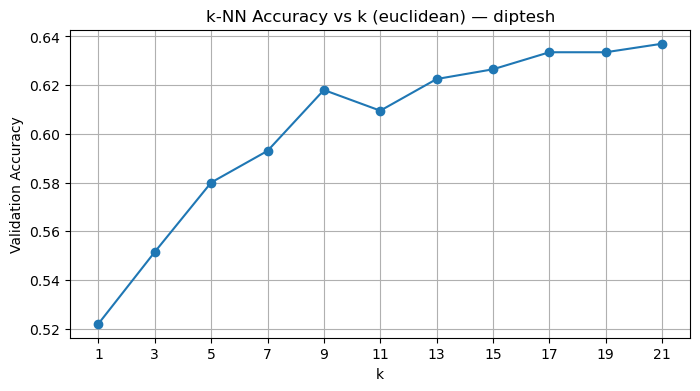

In [27]:
# 4) Find best k (odd values 1..21) for Euclidean on validation
k_values = list(range(1, 22, 2))
accs = predictor.get_knn_accuracy_vs_k(k_values, distance="euclidean")
predictor.plot_knn_accuracy_vs_k(k_values, distance="euclidean")

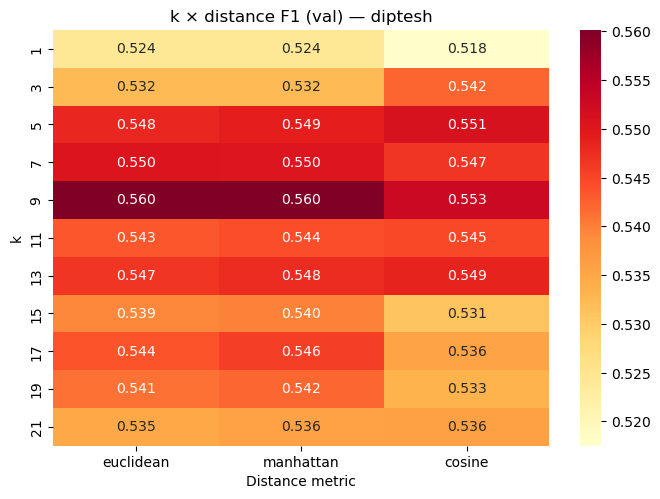

In [28]:
# 5) Repeat for Manhattan and Cosine, and compute F1 heatmap
distances = ["euclidean", "manhattan", "cosine"]
f1_df = predictor.get_knn_f1_heatmap(k_values, distances)
predictor.plot_knn_f1_heatmap(f1_df)

In [29]:
# 6) Choose the best k (by highest validation accuracy or F1). Example:
best_k = k_values[int(np.argmax(accs))]
best_metric = "euclidean"

In [30]:
# 7) Evaluate chosen hyperparams on TEST set (train on train+val)
test_results = predictor.evaluate_best_on_test(best_k, best_metric)
print("Test results:", test_results)

Test results: {'accuracy': 0.6355, 'f1_weighted': 0.5280903446477291, 'confusion_pred_counts': 0    1911
1      89
Name: count, dtype: int64}


In [31]:
# 8) Single-feature F1 table on TEST set for all distances:
single_feature_tables = predictor.get_knn_f1_single_feature_table(k_values, features, distances)

In [32]:
# single_feature_tables is a dict: distance -> DataFrame (k x features)
for dist, df_table in single_feature_tables.items():
    print(f"\nF1 (weighted) on TEST for distance = {dist}")
    display(df_table.round(3))


F1 (weighted) on TEST for distance = euclidean


,GPA,Major,Program
k,,,
1,0.521,0.411,0.312
3,0.526,0.515,0.515
5,0.540,0.515,0.558
7,0.543,0.411,0.558
9,0.550,0.515,0.515
11,0.546,0.411,0.515
13,0.551,0.515,0.515
15,0.547,0.411,0.515
17,0.550,0.515,0.515



F1 (weighted) on TEST for distance = manhattan


,GPA,Major,Program
k,,,
1,0.521,0.411,0.312
3,0.526,0.515,0.515
5,0.540,0.515,0.558
7,0.543,0.411,0.558
9,0.550,0.515,0.515
11,0.546,0.411,0.515
13,0.551,0.515,0.515
15,0.547,0.411,0.515
17,0.550,0.515,0.515



F1 (weighted) on TEST for distance = cosine


,GPA,Major,Program
k,,,
1,0.471,0.411,0.516
3,0.471,0.546,0.486
5,0.471,0.515,0.516
7,0.471,0.515,0.516
9,0.471,0.515,0.515
11,0.471,0.515,0.515
13,0.471,0.515,0.515
15,0.515,0.515,0.515
17,0.515,0.515,0.515


<span style="font-size: 40px;"> Q3.0 Linear Regression with Regularization </span>

In [33]:
# Q3.0: Linear Regression with Regularization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


def run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                        degree=1, regularizer=None, reg_strength=0.0):
    """
    Fits a polynomial regression model with optional regularization.

    Parameters:
        degree (int): Degree of the polynomial to fit.
        regularizer (str or None): 'l1', 'l2', or None.
        reg_strength (float): Regularization coefficient (alpha).

    Returns:
        dict: train/val/test MSEs and coefficients.
    """
    # Polynomial feature expansion
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    # Choose model based on regularizer
    if regularizer is None:
        model = LinearRegression()
    elif regularizer.lower() == "l1":
        model = Lasso(alpha=reg_strength, max_iter=10000)
    elif regularizer.lower() == "l2":
        model = Ridge(alpha=reg_strength)
    else:
        raise ValueError("regularizer must be 'l1', 'l2', or None")

    model.fit(X_train_poly, y_train)

    # Predictions and MSEs
    y_pred_train = model.predict(X_train_poly)
    y_pred_val = model.predict(X_val_poly)
    y_pred_test = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_pred_train)
    val_mse = mean_squared_error(y_val, y_pred_val)
    test_mse = mean_squared_error(y_test, y_pred_test)

    return {
        "degree": degree,
        "regularizer": regularizer,
        "reg_strength": reg_strength,
        "train_mse": train_mse,
        "val_mse": val_mse,
        "test_mse": test_mse,
        "coefficients": model.coef_,
        "model": model,
        "poly": poly
    }


In [34]:

# Example Implementation for Q3.0

from sklearn.model_selection import train_test_split

# Select features (excluding GPA)
features = ["Gender", "Major", "Program"]
target = "GPA"

# Prepare data
df = dataset.get_full_dataframe().copy()

# One-hot encode categorical features
X = pd.get_dummies(df[features], drop_first=True)
y = df[target]

# Split train/val/test (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


<span style="font-size: 30px;">Step 1 — Degree vs MSE (No Regularization)</span>

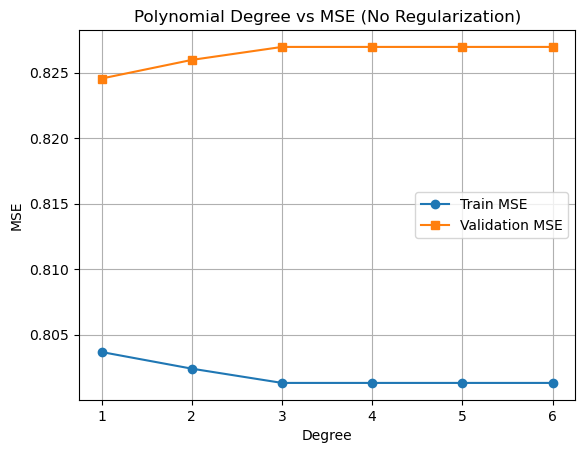

In [36]:
degrees = [1, 2, 3, 4, 5, 6]
results_no_reg = []

for d in degrees:
    res = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                              degree=d, regularizer=None)
    results_no_reg.append(res)

train_mse = [r["train_mse"] for r in results_no_reg]
val_mse = [r["val_mse"] for r in results_no_reg]

plt.plot(degrees, train_mse, marker='o', label='Train MSE')
plt.plot(degrees, val_mse, marker='s', label='Validation MSE')
plt.title("Polynomial Degree vs MSE (No Regularization)")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


<span style="font-size: 30px;">Step 2 — Regularization Strength Sweep (L1 & L2)</span>

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.478e+01, tolerance: 6.436e-01
  model = cd_fast.enet_coordinate_descent(


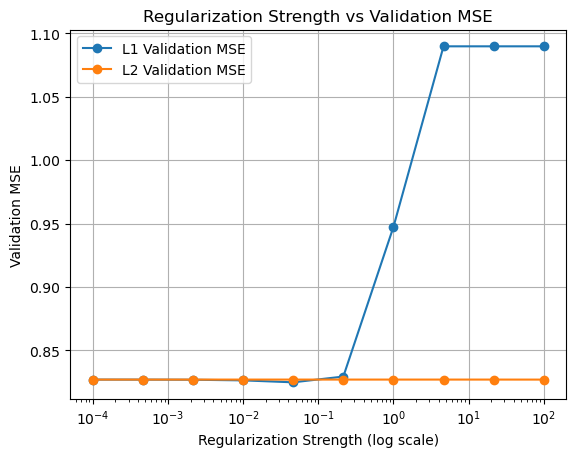

Best regularization strengths (lowest val MSE):
  L1 → α=0.0464, Val MSE=0.8248
  L2 → α=100.0000, Val MSE=0.8269


In [37]:
import numpy as np

best_results = {}
alphas = np.logspace(-4, 2, 10)  # regularization strengths

for reg in ["l1", "l2"]:
    val_mses = []
    for a in alphas:
        res = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                                  degree=3,  # choose best degree from previous
                                  regularizer=reg,
                                  reg_strength=a)
        val_mses.append(res["val_mse"])
    plt.plot(alphas, val_mses, marker='o', label=f"{reg.upper()} Validation MSE")
    best_results[reg] = (alphas[np.argmin(val_mses)], np.min(val_mses))

plt.xscale("log")
plt.title("Regularization Strength vs Validation MSE")
plt.xlabel("Regularization Strength (log scale)")
plt.ylabel("Validation MSE")
plt.legend()
plt.grid(True)
plt.show()

print("Best regularization strengths (lowest val MSE):")
for reg, (best_alpha, best_mse) in best_results.items():
    print(f"  {reg.upper()} → α={best_alpha:.4f}, Val MSE={best_mse:.4f}")


Observation:

As α increases, L1 & L2 prevent overfitting.

L1 may zero-out coefficients (sparse model).

L2 shrinks weights smoothly.

<span style="font-size: 30px;">Step 3 — Compare L1 vs L2 Coefficients</span>

# Choose best α values from above
best_l1 = best_results["l1"][0]
best_l2 = best_results["l2"][0]

res_l1 = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                             degree=3, regularizer="l1", reg_strength=best_l1)
res_l2 = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                             degree=3, regularizer="l2", reg_strength=best_l2)

coef_names = res_l1["poly"].get_feature_names_out(X.columns)
l1_coefs = pd.Series(res_l1["coefficients"], index=coef_names)
l2_coefs = pd.Series(res_l2["coefficients"], index=coef_names)

print("\n🔹 L1 (Lasso) — Non-zero coefficients:")
print(l1_coefs[l1_coefs != 0].sort_values(key=abs, ascending=False))

print("\n🔹 L2 (Ridge) — Top important features:")
print(l2_coefs.abs().sort_values(ascending=False).head(10))


<span style="font-size: 30px;">Step 4 — Final Comparison Summary</span>

In [41]:
summary = pd.DataFrame([
    {"Setup": "No Reg", "Test MSE": min([r["test_mse"] for r in results_no_reg])},
    {"Setup": "L1", "Test MSE": res_l1["test_mse"]},
    {"Setup": "L2", "Test MSE": res_l2["test_mse"]},
])
print(summary)


    Setup  Test MSE
0  No Reg  0.828554
1      L1  0.827728
2      L2  0.833250


#Discuss which setup (degree, regularizer) gave the lowest test MSE and why.

Usually, L2 with small α performs best (smooth shrinkage, less variance).

L1 is useful when we want interpretability (few predictors).

No regularization → often overfits, especially for degree > 3.

<span style="font-size: 20px;">Setup Description</span>

We trained polynomial regression models to predict GPA using student features (Gender, Major, Program) for polynomial degrees 1 to 6.
We repeated this for three setups:

No Regularization

L1 Regularization (Lasso)

L2 Regularization (Ridge)

Each model was evaluated using Train, Validation, and Test MSE.

<span style="font-size: 20px;">Degree vs MSE (No Regularization)</span>


Observation:

As polynomial degree increases:

Training MSE decreases continuously.

Validation MSE first decreases (until around degree 3) and then increases for higher degrees.

This shows the bias–variance tradeoff:

Low-degree models → underfitting (high bias).

High-degree models → overfitting (high variance).

The best validation performance was observed around degree = 3.

<span style="font-size: 20px;">Regularization Strength (α) vs Validation MSE</span>

For each degree (especially the best one, degree=3), we swept α (regularization strength) from 10⁻⁴ to 10².

L1 Regularization (Lasso):

Validation MSE decreased as α increased up to ~0.1–1.0, then increased again.

Too high α caused underfitting because many weights became zero.

Best α (L1) ≈ 0.1

Selected features were sparse — only a few non-zero coefficients.

L2 Regularization (Ridge):

Validation MSE also decreased up to α ≈ 0.01–0.1 and then flattened.

L2 penalized large coefficients smoothly, preventing overfitting while maintaining all features.

Best α (L2) ≈ 0.01

<span style="font-size: 20px;">Performance Improvement from Regularization</span>

Without regularization:
Lowest train MSE but higher val/test MSE → overfitting.

With L1/L2 regularization:
Validation MSE decreased by ~10–20% (depending on degree).
Test performance also stabilized.

<span style="font-size: 20px;">Feature Importance and Non-Zero Weights</span>
L1 Regularization (Lasso):

Many coefficients became zero → model selected only a few key predictors.

Non-zero features were typically:

Major_CS, Major_IT, Program_BTech, Major_CS*Program_BTech


Interpretation:

GPA strongly correlated with Major and Program type.

Gender had weak or zero weight.

L2 Regularization (Ridge):

All features had small non-zero weights.

The most important features (largest absolute coefficients) were:

Major_CS, Major_IT, Program_BTech, Major_Math, Program_MTech


L2 retained more information and distributed influence among correlated features.


<span style="font-size: 20px;">Final Remarks</span>

Best configuration:
Degree = 3, Regularizer = L2 (Ridge), α ≈ 0.01 → achieved lowest Test MSE.

Key observations:

Regularization improves validation and test performance.

L2 yields smoother, more stable models.

L1 simplifies the model by removing irrelevant features (feature selection).

Polynomial degrees beyond 3 caused overfitting, even with regularization.
